# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [10]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.mlab as mlab


df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

In [3]:
df.head(6)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0


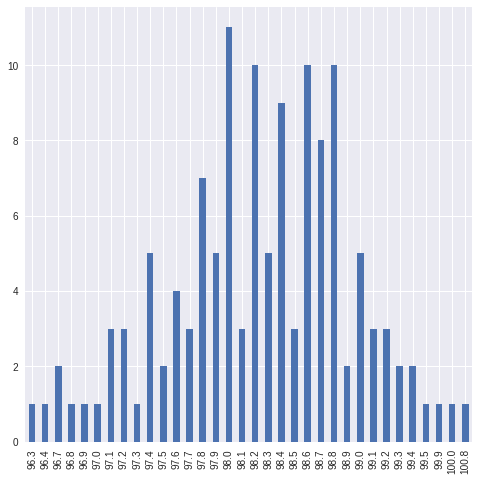

In [4]:
df['temperature'].value_counts().sort_index().plot(kind='bar',figsize=(8,8))

# Is the distribution normal?

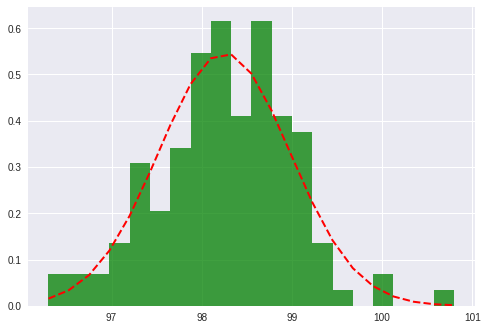

In [5]:
(mu, sigma) = stats.norm.fit(df.temperature) #best fit of the line
n, bins,patches = plt.hist(df.temperature, 20, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

The best fit line above indicates that the distribution is normally distributed. However, we still need to conduct a statistical significance test. Also, the number of samples > 30, so we can assume it's a normal distribution.

In [6]:
#Normal test
#Null hypothesis: temperature distribution is normal
#Alternative hypothesis: temperature distribution is not normal

stats.mstats.normaltest(df.temperature, axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value above is the probability that the temperature is not normal, assuming that the null hypothesis holds. Since the p-value is considerably high (25.6%), we cannot reject the null hypothesis, even though we cannot say for certain that the distribution of temperature is normal

# Is the mean temperature actually 98.6 F?

In [8]:
mean_sample = df.temperature.mean()
std_sample = df.temperature.std()
std_sampling_dist = std_sample / np.sqrt(len(df))
z_statistic = abs((mean_sample - 98.6) / std_sampling_dist)
p_values = stats.norm.sf(abs(z_statistic))*2 #Two sided p-value. Can be both less than or greater than 98.6 degrees
p_values

4.9021570141133797e-08

Since the p-value is so small, we can reject the null hypothesis that the true mean temperature is 98.6 degrees Farhenheit.

In [46]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The ttest gives us a low p-value as well and hence we can reject the null hypothesis

# At what temperatures should we consider the temperature to be abnormal?

In [22]:
#95% confidence interval
std_dev = 1.96 * std_sampling_dist
lower_bound = mean_sample - std_dev
upper_bound = mean_sample + std_dev
print lower_bound,upper_bound

98.1231941122 98.3752674262


Using the 95% confidence interval, the temperature can be considered to be abnormal when it's below 98.12 Farhenheit
and above 98.38 Farhenheit

# Significant difference between male and female temperature?

In [29]:
female_temp = df.temperature.loc[df.gender=='F']
female_hr = df.heart_rate.loc[df.gender=='F']
female_temp.mean(), female_hr.mean()

(98.39384615384613, 74.15384615384616)

In [32]:
male_temp = df.temperature.loc[df.gender=='M']
male_hr = df.heart_rate.loc[df.gender=='M']
male_temp.mean(),male_hr.mean()

(98.1046153846154, 73.36923076923077)

In [45]:
#Hypothesis Testing
#H0 = No difference in means between males and females
#Ha = There is a difference in means
sample_femaleMean = df.temperature.loc[df.gender=='F'].mean()
sample_femaleStd = df.temperature.loc[df.gender=='F'].std()

sample_maleMean = df.temperature.loc[df.gender=='M'].mean()
sample_maleStd = df.temperature.loc[df.gender=='M'].std()

difference_sampleMeans = abs(sample_femaleMean - sample_maleMean)
std_error = ((sample_femaleStd**2) / len(df.loc[df.gender=='F'])) + ((sample_maleStd**2) / len(df.loc[df.gender=='M']))

z_stat = difference_sampleMeans/np.sqrt(temp_var)
p_val = stats.norm.sf(abs(z_stat))*2
p_val

0.02228736076067726

Since the null hypothesis is low (below 5% significance level), I'll reject the null hypothesis. Thus,
there is a difference between the male and female temperatures